In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab.ipynb")
import matplotlib.pyplot as plt
import plotly.express as px

# Lab 4 – Hypothesis and Permutation Testing

## DSC 80, Spring 2023

### Due Date: Monday, October 30th at 11:59 PM

## Instructions
Welcome to the fourth lab assignment in DSC 80 this quarter!

Much like in DSC 10, this Jupyter Notebook contains the statements of the problems and provides code and Markdown cells to display your answers to the problems. Unlike DSC 10, the notebook is *only* for displaying a readable version of your final answers. The coding will be done in an accompanying `lab.py` file that is imported into the current notebook, and **you will only submit that `lab.py` file**, not this notebook!

Some additional guidelines:
- **Unlike in DSC 10, labs will have both public tests and hidden tests.** The bulk of your grade will come from your scores on hidden tests, which you will only see on Gradescope after the assignment deadline.
- **Do not change the function names in the `lab.py` file!** The functions in the `lab.py` file are how your assignment is graded, and they are graded by their name. If you changed something you weren't supposed to, you can find the original code in the [course GitHub repository](https://github.com/dsc-courses/dsc80-2023-fa).
- Notebooks are nice for testing and experimenting with different implementations before designing your function in your `lab.py` file. You can write code here, but make sure that all of your real work is in the `lab.py` file, since that's all you're submitting.
- **To ensure that all of your work to be submitted is in `lab.py`, we've provided an additional uneditable notebook, called `lab-validation.ipynb`, that contains only the tests and their setup. Make sure you are able to run it top-to-bottom without error before submitting!**
- You are encouraged to write your own additional helper functions to solve the lab, as long as they also end up in `lab.py`.

**Importing code from `lab.py`**:

* Below, we import the `.py` file that's contained in the same directory as this notebook.
* We use the `autoreload` notebook extension to make changes to our `lab.py` file immediately available in our notebook. Without this extension, we would need to restart the notebook kernel to see any changes to `lab.py` in the notebook.
    - `autoreload` is necessary because, upon import, `lab.py` is compiled to bytecode (in the directory `__pycache__`). Subsequent imports of `lab` merely import the existing compiled python.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from lab import *

In [4]:
import pandas as pd
import numpy as np
import io
from pathlib import Path
import os

## Part 1: Time Series Data

**Note: You should not use `for`-loops at all in this part!**

Imagine that you own an online store and you'd like to monitor the visits to your site. You've collected information about different login dates and times for different users and stored it in `data/login_table.csv`. Some users are unique, while some visited your store multiple times.

Answer the questions below to better understand the login patterns of your users.

### Question 1 – Prime Time ⏰

Complete the implementation of the function `prime_time_logins`, which takes in a DataFrame like `login` and outputs a DataFrame indexed by `'Login Id'`, counting the number of prime-time logins for each user – that is, the number of logins that were between 4 PM(inclusive) and 8 PM (exclusive) for each user. The DataFrame should have just one column, named `'Time'`.

For example, if a user logs in at 5 PM on Day 1, at 1 PM on Day 2, at 6 PM on Day 2, and at 7 PM on Day 2, then their total number of prime-time logins is 3. Note that the values in your returned DataFrame should only include counts, not timestamp objects.

***Note:*** You do not need to use Python's `datetime` module – instead, use the built-in `pandas` methods for working with times that we introduced in [Lecture 6](https://dsc80.com/resources/lectures/lec06/lec06.html) (though you may need to do a bit more research to fully answer the question).

In [5]:
fp = Path('data')/'login_table.csv'
login = pd.read_csv(fp)
date_format = '%Y-%m-%d'
clean_login = login.assign(Time = pd.to_datetime(login['Time'], format=date_format))
clean_login['Time'].dt.hour
clean_login['Hour'] = clean_login['Time'].dt.hour
clean_login.loc[(clean_login['Hour'] >= 16) & (clean_login['Hour'] < 20), 'Count'] = 1
clean_login.groupby('Login Id').sum().drop(columns=['Hour'])

,Count
Login Id,
381,1.0
393,12.0
412,13.0
413,64.0
419,2.0
...,...
1302,2.0
1304,0.0
1305,1.0


In [7]:
# don't change this cell -- it is needed for the tests to work
fp = Path('data')/'login_table.csv'
login = pd.read_csv(fp)
q1_result = prime_time_logins(login)
q1_result

,Time
Login Id,
381,1.0
393,12.0
412,13.0
413,64.0
419,2.0
...,...
1302,2.0
1304,0.0
1305,1.0


In [147]:
grader.check("q1")

q1 results: All test cases passed!

### Question 2 – Return Users 🔁

As a site owner, you would like to find your most enthusiastic users – the ones who return to your site most frequently. You've noticed that there are users who have several logins and users who logged in only once. You are interested in finding the number of logins *per day* for each user.

Complete the implementation of the function `count_frequency`, which takes in a DataFrame like `login` and outputs a Series containing the number of logins per day for each user. Your Series should have `'Login Id'`s in its index, and the frequencies as its values. The order of users in the index is arbitrary.

To do this, you can assume today is  January 31, 2023. The first login date of a user is the first day of their membership on the site, and you may assume they are still a member today. For simplicity, you only need to count full days that a user has been a member till the end of today. For example, if a user's first login was 12 days and 5 hours ago, you can say that they have been a user for 12 days. 

***Hint:*** Can you write a custom aggregator that allows you to do this with just one `.groupby`?

In [8]:
today = pd.to_datetime('2023-1-31')
login
num_login = clean_login.groupby('Login Id').size()

In [9]:
date_format = '%Y-%m-%d'
clean_login = login.assign(Time = pd.to_datetime(login['Time'], format=date_format))
clean_login['Time']
membership_days = clean_login.groupby('Login Id')['Time'].min().apply(lambda x: (today - x).days)
num_login/membership_days

Login Id
381     0.062500
393     0.093151
412     0.279570
413     0.609890
419     0.018462
          ...   
1302    0.333333
1304    0.200000
1305    0.142857
1306    0.333333
1307    0.800000
Length: 433, dtype: float64

In [10]:
# don't change this cell -- it is needed for the tests to work
fp = Path('data')/'login_table.csv'
login = pd.read_csv(fp)
q2_result = count_frequency(login)

In [11]:
q2_result

Login Id
381     0.062315
393     0.092896
412     0.276596
413     0.608219
419     0.018405
          ...   
1302    0.307692
1304    0.181818
1305    0.125000
1306    0.285714
1307    0.666667
Length: 433, dtype: float64

In [12]:
grader.check("q2")

q2 results: All test cases passed!

## Part 2: Hypothesis Testing

In this section, you'll recall the terms and structure of hypothesis testing from DSC 10.

The first step is always to define what you're looking at, create your hypotheses, and set a level of significance (i.e. a p-value cutoff). Once you've done that, you can find a p-value.

If all of these words are foreign, look at the [Lecture 6](https://dsc80.com/resources/lectures/lec06/lec06.html) notebook and the readings, and don't forget to think about the real-world meaning of these terms!  The following example describes a real-world scenario, which should help keep it easy to interpret.

Note that you **can** use `for`-loops to conduct hypothesis and permutation tests in assignments.

### Question 3 – Surf's Up 🏄

In San Diego, students are looking to surf in their free time. There is a pop-up surf store on Library Walk selling wet suits and surf board to students. Last Saturday, this store sold 250 wet suits to UCSD students. After a surf session, 10 students complained that their wet suits had tears in them, letting cold ocean water to rush in their suits. In response to the student dissatisfaction, the store claims that 98% of their wet suits are produced without any manufacturing defects. You think this seems unlikely and decide to investigate.

First, select a significance level for your investigation. You don't need to turn this in anywhere. Then, complete the implementation of the following three functions.

#### `null_hyp`

Complete the implementation of the function `suits_null_hyp`, which has no parameters and returns your answer to the following question **as a list**.

What are reasonable choices for the **null hypothesis** for your investigation? Select all that apply.
1. The store sells wet suits that are approximately 2% defective.
2. The store sells wet suits that are 98% non-defective.
3. The store sells wet suits that are less than 98% non-defective.
4. The store sells wet suits that are at least 2% defective.

<br>

#### `simulate_suits_null`

Complete the implementation of the function `simulate_suits_null`, which simulates a single step of the data generation process under the null hypothesis. The function should return a binary array, i.e. an array of 0s and 1s, of length 250. It is up to you to decide what the 0s and 1s mean.

***Hints:*** `np.random.choice` might be useful in this case.

<br>

#### `estimate_p_val`

Complete the implementation of the function `estimate_suits_p_val`, which takes in an integer `N` and returns the estimated p-value of your investigation upon simulating the null hypothesis `N` times.

***Note***: Plot the null distribution and your observed statistic to check your work. (If you decide to plot, you may have to run `import matplotlib.pyplot as plt` or `import plotly.express as px`.)

In [160]:
data = [0, 1]
probabilities = [0.98, 0.02]
sample = np.random.choice(data, size=250, p=probabilities)
sample

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

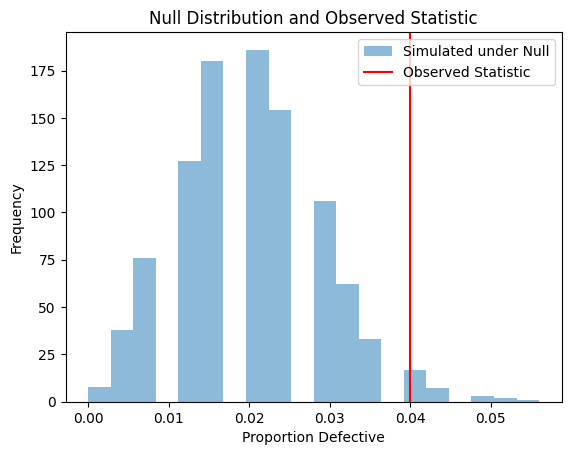

In [159]:
import matplotlib.pyplot as plt
results = []
for i in range(1000):
        sample = simulate_suits_null()
        sample_mean = sample.mean()
        results.append(sample_mean)
observed = 10/250
results
p_val = np.mean([1 if sample_mean >= observed else 0 for sample_mean in results])
p_val
plt.hist(results, bins=20, alpha=0.5, label="Simulated under Null")
plt.axvline(observed, color='red', label="Observed Statistic")
plt.legend()
plt.xlabel("Proportion Defective")
plt.ylabel("Frequency")
plt.title("Null Distribution and Observed Statistic")
plt.show()

In [15]:
grader.check("q3")

q3 results: All test cases passed!

Now that we've gotten our feet wet with hypothesis testing, let's take a closer look at how to choose null and alternative hypotheses and test statistics.

### Question 4 – Tires 🚗

A tire manufacturer, TritonTire, claims that their tires are so good, they will bring a Toyota Highlander from 60 mph to a complete stop in under 106 feet, 97% percent of the time.

Now, you own a Toyota Highlander equipped with TritonTire tires, and you decide to test this claim. You take your car to an empty Vons parking lot, speed up to exactly 60 mph, hit the brakes, and measure the stopping distance. As illegal as it is, you repeat this process 50 times and find that **you stopped in under 106 feet only 47 of the 50 times**.

Livid, you call TritonTire and say that their claim is false. They say, no, that you were just unlucky: your experiment is consistent with their claim. But they didn't realize that they are dealing with a *data scientist* 🧑‍🔬.

To settle the matter, you decide to unleash the power of the hypothesis test. The following three subparts ask you to answer a total of four select-all multiple choice questions.

#### Question 4.1

You will set up a hypothesis test in order to test your suspicion that the tires are are actually worse than claimed. Which of the following are valid null and alternative hypotheses for this hypothesis test?

1. The tires will stop your car in under 106 feet exactly 97% of the time.
0. The tires will stop your car in under 106 feet less than 97% of the time.
0. The tires will stop your car in under 106 feet greater than 97% of the time.
0. The tires will stop your car in more than 106 feet exactly 3% of the time.
0. The tires will stop your car in more than 106 feet less than 3% of the time.
0. The tires will stop your car in more than 106 feet greater than 3% of the time.

Complete the implementation of the function `car_null_hypoth`, which takes zero arguments and returns a list of integers, corresponding to the the valid null hypotheses above.
Also complete the implementation of the function called `car_alt_hypoth`, which takes zero arguments and returns a list of integers, corresponding to the valid alternative hypotheses above.

<br>

#### Question 4.2

Which of the following are valid test statistics for our question?

1. The number of times the car stopped in under 106 feet in 50 attempts.
1. The average number of feet the car took to come to a complete stop in 50 attempts.
1. The number of attempts it took before the car stopped in under 95 feet.
1. The proportion of attempts in which the car stopped in under 106 feet in 50 attempts.

Complete the implementation of the function `car_test_stat`, which takes zero arguments and returns a list of integers, corresponding to the valid test statistics above

<br>

#### Question 4.3

The p-value is the probability, under the assumption the null hypothesis is true, of observing a test statistic **equal to our observed statistic, or more extreme in the direction of the alternative hypothesis**.

Why don't we just look at the probability of observing a test statistic equal to our observed statistic? That is, why is the "more extreme in the direction of the alternative hypothesis" part necessary?

1. Because our observed test statistic isn't extreme.
4. Because our null hypothesis isn't suggesting equality.
5. Because our alternative hypothesis isn't suggesting equality.
2. Because the probability of finding our observed test statistic equals the probability of finding something more extreme.
3. Because if we run more and more trials (where a trial is speeding up the car then stopping), the probability of finding *any* particular observed test statistic gets closer and closer to zero, so if we did this we would always reject the null with more trials even if the null is true. For example, flipping a fair coin twice means it’s pretty likely to see 50% heads, but flipping it 10000 times means it’s quite unlikely to see 50% heads.

Complete the implementation of the function `car_p_value`, which takes zero arguments and returns the correct reason as an integer (not a list).

In [43]:
grader.check("q4")

q4 results: All test cases passed!

### Question 5 – Superheroes 🦸

In the previous two questions, we ran hypothesis tests that didn't require us to look at stored data. In this next question, we'll return to the `heroes` DataFrame from Lab 2, which is read in from the file `data/superheroes.csv`.

Our goal in this section will be to answer the question:

> Are blond-haired, blue-eyed characters significantly **more** "good" than the general pool of characters?

#### `bhbe_col`

To start, complete the implementation of the function `bhbe_col`, which takes in a DataFrame like `heroes` and returns a Boolean Series that contains `True` for characters that have **both** blond hair and blue eyes, and `False` for all other characters. 

***Note***: If a character's hair color contains the word `'blond'`, uppercase or lowercase, we consider their hair to be blond for the purposes of this question. Similarly, if a character's eye color contains the word `'blue'`, uppercase or lowercase, we consider their eye color to be blue for the purposes of this question.

<br>

Now that you have an easy way of accessing only the blond-haired, blue-eyed characters in `heroes`, you can proceed with a hypothesis test. You choose the following null hypothesis:

> The proportion of "good" characters among blond-haired, blue-eyed characters is equal to the proportion of "good" characters in the overall population."

Fix a significance level (i.e. p-value cutoff) of 1%.

Before proceeding, think about what test statistic to use in this hypothesis test (and to do that, read the initial question carefully). Once you've done that, complete the implementations of the following functions.

***Hint:*** Alternative hypothesis: the distribution of "good" characters among blond-haired, blue-eyed characters is different from the proportion of "good" characters in the overall population.

<br>

#### `superheroes_observed_stat`
Complete the implementation of the function `superheroes_observed_stat`, which takes in the DataFrame `heroes` and returns the observed test statistic.

<br>

#### `simulate_bhbe_null` 
Complete the implementation of the function `simulate_bhbe_null`, which takes in a positive integer `n` and returns an array of length `n`, where each element is a simulated test statistic according to the null hypothesis. You should hard-code the simulation parameter within your function; do not read in any data. (The simulation parameter is a proportion/probability; you can round it to two decimal places.)

***Hint:*** While you're not prohibited from using a `for`-loop, try avoiding one here. You can access columns of a multidimensional array the same way you access columns of a DataFrame using `iloc`.

<br>

#### `superheroes_calc_pval` 
Complete the implementation of the function `superheroes_calc_pval`, which takes in no parameters and returns a list where:
* The first element is the p-value for the hypothesis test (using 100,000 simulations). Please run the code yourself **in your notebook** and hard-code this answer **in your `.py` file**, as actually running the 100,000 simulation hypothesis test will timeout on Gradescope.
* The second element is `'Reject'` if you reject the null hypothesis and `'Fail to reject'` if you fail to reject the null hypothesis, at the 1% significance level.

In [142]:
superheroes_fp = Path('data')/'superheroes.csv'
heroes = pd.read_csv(superheroes_fp, index_col=0)

In [143]:
heroes['Eye color'].str.lower().str.contains('blue') & heroes['Hair color'].str.lower().str.contains('blond')

0      False
1      False
2      False
3      False
4      False
       ...  
729     True
730    False
731    False
732    False
733    False
Length: 734, dtype: bool

In [144]:
num_bb = bhbe_col(heroes)
num_bb_good = (heroes[num_bb]['Alignment'] == 'good').sum()
prop_bb_good = num_bb_good/num_bb.sum()
prop_all_good = (heroes['Alignment'] == 'good').sum()/heroes.shape[0]
abs(prop_bb_good-prop_all_good)
print(prop_bb_good)

0.8494623655913979


In [145]:
obs_stat_out = superheroes_observed_stat(heroes)
obs_stat_out

0.8494623655913979

In [146]:
# results = []
count_extreme_values = 0
# for _ in range(100_000):
#     result = np.mean(simulate_bhbe_null(100))
#     results.append(result)
#     if result >= obs_stat_out:
#             count_extreme_values += 1
result = simulate_bhbe_null(100_000)
p_value=np.mean(result >= obs_stat_out)
# p_value = count_extreme_values / 100_000

if p_value < 0.01:
    result = "Reject"
else:
    result = "Fail to Reject"

(p_value, result)

(6e-05, 'Reject')

In [147]:
fig = px.histogram(pd.DataFrame(results), x=0, nbins=20, histnorm='probability', 
                   title='Empirical Distribution of the TVD')
fig.add_vline(x=obs_stat_out, line_color='red')
fig

In [73]:
n = np.random.multinomial(100, [0.5, 0.5], size=100_000)[:, 0]/100
((0.45 <= n) & (n <= 1))
n

array([0.48, 0.45, 0.5 , ..., 0.49, 0.5 , 0.52])

In [74]:
simulate_bhbe_null(100000).sum()/100000


0.6799158000000002

In [164]:
# don't change this cell -- it is needed for the tests to work
superheroes_fp = Path('data')/'superheroes.csv'
heroes = pd.read_csv(superheroes_fp, index_col=0)
bhbe_out = bhbe_col(heroes)

obs_stat_out = superheroes_observed_stat(heroes)

simulate_bhbe_out = simulate_bhbe_null(10)

pval_out = superheroes_calc_pval()

In [165]:
grader.check("q5")

q5 results: All test cases passed!

## Part 3: Permutation Testing

Recall, hypothesis tests answer questions of the form:

> I have a population distribution, and I have one sample. Does this sample look like it was drawn from the population?

While permutation tests answer questions of the form:

> I have two samples, but no information about any population distributions. Do these samples look like they were drawn from the same population?

Keep this in mind while working on this last part of the lab.

<br>

[Skittles](https://en.wikipedia.org/wiki/Skittles_(confectionery)) 🍬 are made in two locations in the United States: Yorkville, Illinois and Waco, Texas. In these factories, Skittles of different colors are made separately by different machines and combined/packaged into bags for sale. The **tab-separated file** `data/skittles.tsv` contains the contents of 468 bags of Skittles.

Throughout this question, we will compare the color distribution of Skittles between bags made in the Yorkville factory and bags made in the Waco factory. Most people have preferences for their favorite flavor, and there is a surprising amount of variation among the distribution of flavors in each bag.

Look at the variation by bag in the dataset below:

In [79]:
skittles_fp = Path('data')/'skittles.tsv'
skittles = pd.read_csv(skittles_fp, sep='\t')
skittles.head()

,red,orange,yellow,green,purple,Factory
0,10,15,11,7,18,Yorkville
1,5,12,17,15,10,Yorkville
2,16,11,15,11,9,Waco
3,15,8,13,16,7,Waco
4,11,14,20,8,7,Waco


In [80]:
skittles.shape

(468, 6)

### Question 6 – Orange Skittles 🟠

First, you will investigate if the machine that mixes together the Skittles of different colors might favor one color over another. Use a permutation test to assess whether, on average, bags made in Yorkville have the same number of orange skittles as bags made in Waco. Do this by implementing the functions described below.

<br>

#### `diff_of_means`

Complete the implementation of the function `diff_of_means`, which takes in a DataFrame like `skittles` and returns the **absolute difference** between the **mean** number of orange Skittles per bag from Yorkville and the **mean** number of orange Skittles per bag from Waco.

<br>

#### `simulate_null`

Complete the implementation of the function `simulate_null`, which takes in a DataFrame like `skittles` and returns one simulated instance of the test statistic under the null hypothesis. Note that this will involve shuffling the `'Factory'` column!

<br>

#### `pval_color`

Complete the implementation of the function `pval_color`, which takes in a DataFrame like `skittles` and calculates the p-value for the permutation test using 1000 trials.

<br>

Plot the observed statistic, along with the histogram for the simulated distribution, to check your work.

***Note:*** In all functions, the default argument for `col` is `'orange'`. Your functions should still work for any color so that you can call it in later questions.

In [164]:
abs(skittles.groupby('Factory')['orange'].mean()[0]-skittles.groupby('Factory')['orange'].mean()[1])

0.6004398826979482

In [165]:
new_shuffled = skittles.assign(Shuffled_factory=np.random.permutation(skittles['Factory']))
abs(new_shuffled.groupby('Shuffled_factory')['orange'].mean()[0]-new_shuffled.groupby('Shuffled_factory')['orange'].mean()[1])

0.23159824046920896

In [171]:
n_repetitions = 1000

differences = []
for _ in range(n_repetitions):
    diff = simulate_null(skittles, 'orange')
    differences.append(diff)
np.mean(differences >= diff_of_means(skittles, 'orange'))

0.055

In [172]:
# don't change this cell -- it is needed for the tests to work
# cell may take about 1-2 minutes to execute to completion
skittles_fp = Path('data')/'skittles.tsv'
skittles = pd.read_csv(skittles_fp, sep='\\t', engine='python')
q6_diff_of_means_out = diff_of_means(skittles)
q6_simulate_null_out = simulate_null(skittles)
q6_pval_out = pval_color(skittles)

In [173]:
q6_pval_out

0.047

In [174]:
grader.check("q6")

q6 results: All test cases passed!

### Question 7 – Generalizing to all colors 🔴🟠🟡🟢🟣

While your `pval_color` function used a default color of `'orange'`, it should also work for all other colors of Skittles, meaning you can run the same permutation test from Question 7 on all colors of Skittles. Call `pval_color` on all colors of Skittles to find which colors differ the most between the two locations on average. 

Then, complete the implementation of the function `ordered_colors`, which returns a list of five ordered pairs, each of the form `('color', p_value)`. For example, your list might look like `[('pink', 0.000), ('brown', 0.025), ...]`. 

The list should be **hard-coded**, meaning that you should run your permutation tests in your notebook, not in your `.py` file. The list should also be sorted in **increasing order of p-value**. Make sure your p-values are rounded to **3 decimal places**.

Even though there is randomness in the color composition in each bag, this list gives the likelihood that the machines have a systematic, meaningful, difference in how they blend the colors in each bag.

In [179]:
result = []
for col in skittles.drop(columns=['Factory']).columns:
    diff = pval_color(skittles, col)
    result.append((col, diff))
result.sort(key=lambda x: x[1])
result

[('yellow', 0.0),
 ('orange', 0.033),
 ('red', 0.227),
 ('green', 0.472),
 ('purple', 0.977)]

In [180]:
# don't change this cell -- it is needed for the tests to work
q7_out = ordered_colors()
q7_colors = {'green', 'orange', 'purple', 'red', 'yellow'}
q7_test_colors = [x[0] for x in q7_out]

In [181]:
q7_out[0][1]

0.0

In [182]:
grader.check("q7")

q7 results: All test cases passed!

### Question 8 – Overall distributions 🏭

Now, suppose you would like to assess whether the two locations make similar amounts of each color overall. That is, suppose we:
* Combine and count up all the Skittles of each color that were made in Yorkville (e.g. 14303 total red skittles, 9091 total green skittles, etc.).
* Combine and count up all the Skittles of each color that were made in Waco.

**Are these distributions of colors similar?** Is the variation among the bags due to each factory making different amounts of each color?

Use a permutation test to assess whether the distribution of colors of Skittles made in Yorkville is statistically significantly different than those made in Waco. Set a significance level (i.e. p-value cutoff) of 0.01 and determine whether you can reject a null hypothesis that answers the question above using a permutation test with 1000 trials. For your test statistic, use the **total variation distance (TVD)**.

Refer to [Lecture 6](https://dsc80.com/resources/lectures/lec06/lec06.html) to see an example of a [permutation test](https://www.inferentialthinking.com/chapters/12/Comparing_Two_Samples.html) that uses the [TVD](https://inferentialthinking.com/chapters/11/2/Multiple_Categories.html) as the test statistic. Some guidance:

- Our previous permutation tests have compared the mean number of (say) orange Skittles in Yorkville bags to the mean number number of orange Skittles in Waco bags. The role of shuffling was to randomly assign bags to Yorkville and Waco.
- In this permutation test, we are **still** shuffling to randomly assign bags to Yorkville and Waco. The only difference is that after we randomly assign each bag to a factory, we will compute the **distribution** of colors among the two factories and find the TVD between those two distributions.

**Your job:** Complete the implementation of the function `same_color_distribution`, which takes in no arguments and outputs a hard-coded **tuple** with the p-value and whether you `'Fail to Reject'` or `'Reject'` the null hypothesis.

In [183]:
dis = skittles.groupby('Factory').sum()
waco_dis = dis.loc['Waco']/skittles.groupby('Factory').sum().sum(axis=1)[0]
york_dis = dis.loc['Yorkville']/skittles.groupby('Factory').sum().sum(axis=1)[1]

In [184]:
np.sum(np.abs(waco_dis - york_dis)) / 2
skittles_shuffled = skittles.assign(Shuffled_factory=np.random.permutation(skittles['Factory']))
dis_shuf = skittles_shuffled.groupby('Shuffled_factory').sum()
waco_dis_shuf = dis_shuf.loc['Waco']/skittles_shuffled.groupby('Factory').sum().sum(axis=1)[0]
york_dis_shuf = dis_shuf.loc['Yorkville']/skittles_shuffled.groupby('Factory').sum().sum(axis=1)[1]

In [185]:
count_extreme_values = 0
observed_tvd = np.sum(np.abs(waco_dis - york_dis)) / 2
for _ in range(1000):
    skittles_shuffled = skittles.assign(Shuffled_factory=np.random.permutation(skittles['Factory']))
    dis_shuf = skittles_shuffled.groupby('Shuffled_factory').sum()
    waco_dis_shuf = dis_shuf.loc['Waco']/skittles_shuffled.groupby('Factory').sum().sum(axis=1)[0]
    york_dis_shuf = dis_shuf.loc['Yorkville']/skittles_shuffled.groupby('Factory').sum().sum(axis=1)[1]
    permuted_tvd = np.sum(np.abs(waco_dis_shuf - york_dis_shuf)) / 2
    if permuted_tvd >= observed_tvd:
        count_extreme_values += 1

p_value = count_extreme_values / 1000

if p_value < 0.01:
    result = "Reject"
else:
    result = "Fail to Reject"

(p_value, result)

(0.004, 'Reject')

In [180]:
# don't change this cell -- it is needed for the tests to work
q8_out = same_color_distribution()

In [181]:
q8_out

(0.008, 'Reject')

In [182]:
grader.check("q8")

q8 results: All test cases passed!

### Question 9 – Permutation testing vs. hypothesis testing 🧪

In each of the following scenarios, decide  whether  a  permutation test is appropriate to determine if there is a  significant difference between the quantities described. If a permutation test is appropriate, mark `'P'`. Otherwise, mark `'H'`.

Record your answers in the function `perm_vs_hyp` that outputs a list of length 5, containing the values `'P'` and `'H'`.

1. Compare the DSC 80 pass rate between second years and third years who take the class.
2. Compare the proportion of Data Science majors who have completed DSC 80 and the proportion of Data Science minors who have completed DSC 80.
3. Compare the proportion of students who have iPhones to the proportion of students who have Android phones (for simplicity, assume that all students either have an iPhone or an Android).
4. In DSC 80, we ask all students whether they liked DSC 40A or DSC 40B more. Compare the proportion of students who preferred DSC 40A to the proportion who preferred DSC 40B.
5. Compare the attendance rate of classes that play music before class vs. classes that do not play music before class.

***Hint:*** Think about the type of data you would collect in each case, and how you would simulate new data under the null hypothesis. It will be useful to refer to the explanation at the start of Part 4.

In [183]:
# don't change this cell -- it is needed for the tests to work
q9_out = perm_vs_hyp()

In [184]:
grader.check("q9")

q9 results: All test cases passed!

## Congratulations! You're done with Lab 4! 🏁

As a reminder, all of the work you want to submit needs to be in `lab.py`.

To verify that all of your work is indeed in `lab.py`, and that you didn't accidentally implement a function in this notebook and not in `lab.py`, we've included another notebook in the lab folder, called `lab-validation.ipynb`. `lab-validation.ipynb` is a version of this notebook with only the `grader.check` cells and the code needed to set up the tests. 

### **Go to `lab-validation.ipynb`, and go to Kernel > Restart & Run All.** This will check if all `grader.check` test cases pass using just the code in `lab.py`.

Once you're able to pass all test cases in `lab-validation.ipynb`, including the call to `grader.check_all()` at the very bottom, then you're ready to submit your `lab.py` (and only your `lab.py`) to Gradescope. Once submitting to Gradescope, make sure to stick around until all test cases pass.

There is also a call to `grader.check_all()` below in _this_ notebook, but make sure to also follow the steps above.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [185]:
grader.check_all()

q1 results: All test cases passed!

q2 results: All test cases passed!

q3 results: All test cases passed!

q4 results: All test cases passed!

q5 results: All test cases passed!

q6 results: All test cases passed!

q7 results: All test cases passed!

q8 results: All test cases passed!

q9 results: All test cases passed!